<a href="https://colab.research.google.com/github/NajjarAli/Multimedia-Tasks/blob/main/MultiMedia_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#**Name: Ali Najjar  ,  ID:1172738**
#        **Multi Media First Task** 



#**Importing Needed Libraries** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files
import cv2
from PIL import Image
from numpy import array
import scipy
from scipy.fftpack import dct
from scipy.fftpack import idct
from numpy import r_
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow

# Importing Image from your device

Note: if you import image from your device rename the image name in the code down below

In [ ]:

uploaded = files.upload()




---



# Functions Used DCT-2D , IDCT-2D  & ZigZag

**Creating 2d-DCT and 2d-IDCT from DCT**

In [ ]:
def DCT2d(arr):
    return scipy.fftpack.dct( scipy.fftpack.dct( arr, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def IDCT2d(arr):
    return scipy.fftpack.idct( scipy.fftpack.idct( arr, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [ ]:
# the zigzag function takes the matrix it needed to change the last k cofficients to Zero
def ZigZag(arr,k):
  count = 0
  for i in range(len(arr)-1,-1,-1):
    for j in range(len(arr[0])-1,-1,-1):
        if count > k:
          return arr
        else:
          arr[i][j] = 0
          count += 1

# Image reading, Applying DCT & IDCT

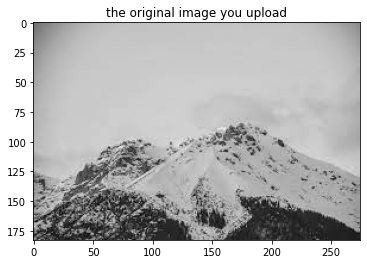

In [ ]:
# change the image name to the name of the image you import from your device
image = cv2.imread('mount.jfif')
f = plt.figure()
plt.title("the original image you upload")
plt.imshow(image,cmap='gray')


**Applying Dct & Convert the last K coefficients to zero**

In [ ]:
#creating three arrays each one with more cofficients to change to zero
imsize = image.shape
dct = np.zeros(imsize) # this array is not changed it retrived completey 
dct_k1 = np.zeros(imsize) # k = 20
dct_k2 = np.zeros(imsize) # k = 40
dct_k3 = np.zeros(imsize) # k = 50

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = DCT2d( image[i:(i+8),j:(j+8)]) # applying Dct without changing coffiecients
        dct_k1[i:(i+8),j:(j+8)] = ZigZag(DCT2d( image[i:(i+8),j:(j+8)]),20) # applying DCT and minimum k changing
        dct_k2[i:(i+8),j:(j+8)] = ZigZag(DCT2d( image[i:(i+8),j:(j+8)]),40) # applying DCT and mediam k changing
        dct_k3[i:(i+8),j:(j+8)] = ZigZag(DCT2d( image[i:(i+8),j:(j+8)]),50)  # applying DCT and maximum k changing


**Inversing the DCT image array using IDCT**

In [ ]:
im_dctk = np.zeros(imsize)
im_dctk1 = np.zeros(imsize)
im_dctk2 = np.zeros(imsize)
im_dctk3 = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = IDCT2d( dct[i:(i+8),j:(j+8)] )
        im_dctk1[i:(i+8),j:(j+8)] = IDCT2d( dct_k1[i:(i+8),j:(j+8)] )
        im_dctk2[i:(i+8),j:(j+8)] = IDCT2d( dct_k2[i:(i+8),j:(j+8)] )
        im_dctk3[i:(i+8),j:(j+8)] = IDCT2d( dct_k3[i:(i+8),j:(j+8)] )

**Printing the images next to others to see the difference**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'most k changing k = 60 changing last 60 zigzag')

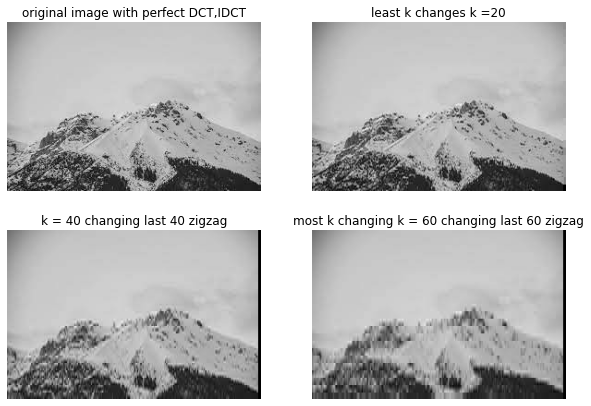

In [ ]:

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(im_dct.astype(int))
plt.axis('off')
plt.title("original image with perfect DCT,IDCT")
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(im_dctk1.astype(int))
plt.axis('off')
plt.title("least k changes k =20")
  
# Adds a subplot at the 3rd position
fig.add_subplot(2, 2, 3)
  
# showing image
plt.imshow(im_dctk2.astype(int))
plt.axis('off')
plt.title("k = 40 changing last 40 zigzag")
  
# Adds a subplot at the 4th position
fig.add_subplot(2, 2, 4)
  
# showing image
plt.imshow(im_dctk3.astype(int))
plt.axis('off')
plt.title("most k changing k = 60 changing last 60 zigzag")